# Fakultät für Physik

## Physikalisches Praktikum P2 für Studierende der Physik

Versuch P2-53, 54, 55 (Stand: März 2024)

[Raum F1-13](https://labs.physik.kit.edu/img/Praktikum/Lageplan_P2.png)



# Franck-Hertz-Versuch

Tin Vrkic E-Mail: uyvpq@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
\end{split}
\end{equation*}

Mika Nock E-Mail: uttzi@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Gruppennummer: Mo32

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}


Betreuer: Michael Waßmer

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Versuch durchgeführt am: 24.06.2024

---

**Beanstandungen:**

\begin{equation*}
\begin{split}
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
\end{split}
%\text{\vspace{10cm}}
\end{equation*}

<br>
Testiert am: __________________ Testat: __________________

# Durchführung

**Die Anleitung zu diesem Versuch finden Sie [hier](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Franck_Hertz_Versuch/README.md).**

In [2]:
import pathlib
import pandas as pd
import numpy as np
import kafe2
import scipy as sc
import matplotlib.pyplot as plt
from uncertainties import ufloat, unumpy as unp

In [3]:
# erstellen einer Funktion für kafe2 Fits
def fit_funktion(xy_data, model_function, xy_error, xy_label, title, constraint=[], add_error=True):
    xy_data = kafe2.XYContainer(xy_data[0], xy_data[1])
    xy_data.label = title
    fit = kafe2.XYFit(xy_data = xy_data, model_function = model_function)
    if add_error:
        fit.add_error(axis = 'x', err_val = xy_error[0])
        fit.add_error(axis = 'y', err_val = xy_error[1])
    for i in range(len(constraint)):
        fit.add_parameter_constraint(name = constraint[i][0], value = constraint[i][1], uncertainty = constraint[i][2])
    fit.do_fit()
    plot = kafe2.Plot(fit)
    plot.x_label, plot.y_label = xy_label[0], xy_label[1]
    
    return fit.parameter_values, fit.parameter_errors, plot

e = 1.602176634 * 10**(-19)

## Aufgabe 1: Messanordnung

**Hinweise zu Aufgabe 1 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Franck_Hertz_Versuch/doc/Hinweise-Versuchsdurchfuehrung.md).**

 - Bauen Sie die Schaltung der Franck-Hertz-$\mathrm{Hg}$-Röhre mit dem zugehörigen Betriebsgerät auf. 
 - Machen Sie sich mit dem Versuchsaufbau vertraut, indem Sie die folgenden Aufgaben bearbieten.

---

### Aufgabe 1.1: Beschreibung der Messanordnung

 * Beschreiben Sie die Messanordnung, die Sie für diesen Versuch vorfinden in eigenen Worten.

---

Die vorgefundene Messanordnung besteht aus drei verschiedenen Teilen. Im Zentrum steht ein Ofen, in dem sich die Franck-Hertz-Röhre befindet. Am Ofen befinden sich ein Thermometer und verschiedene Voltmeter, die an ein Steuergerät angeschlossen sind. Das Steuergerät verfügt über Einstell- und Messmöglichkeiten für jede der Spannungen (Saugspannung, Driftspannung und Gegenfeldspannung) und außerdem über Möglichkeiten, Einfluss auf die zeitabhängige Form von $U_2$ zu nehmen. 


---

### Aufgabe 1.2: Effekt der Steuerparameter an der Röhre

 * Beschreiben Sie in eigenen Worten die Effekte, die einzelne Variationen der Parameter $\vartheta$, $U_{1}$, $U_{2}$ und $U_{3}$ auf $I_{A}$ haben. 
 * Nehmen Sie für $\theta=180,\,160,\,140,\,120^{\circ}\,\mathrm{C}$ jeweils einen Verlauf von $I_{A}$ als Funktion von $U_{2}$, für entsprechend optimierte Werte von $U_{1}$ und $U_{3}$, auf und fügen Sie Ihrem Protokoll eine entsprechende Darstellungen bei. Notieren Sie zu jeder Darstellug die verwendeten Werte von $U_{1}$ und $U_{3}$. 
 * Beschrieben Sie den Kurvenverlauf und die entsprechenden Änderungen qualitativ.

---

Die Spannung $U_1$ liegt zwischen der Glühkathode und dem Gitter $G_1$ an. Durch diese Spannung werden die Elektronen, die aus der Glühkathode ausgelöst werden, abgesaugt und Richtung Driftraum beschleunigt, um Platz für die nächsten Elektronen zu schaffen. Sie reguliert also effektiv den Elektronenstrom durch die Röhre, da sie bestimmt, wie schnell wie viele Elektronen in den Driftraum nachrücken. Je schneller neue Elektronen nachkommen, und damit je höher $U_1$, um so höher kann $I_A$ sein. In Graphen $b)$ in der Abbildung unten geht $I_A$ schon vor Erreichen des Maximalwertes von $U_2$ in die Sättigung, der Graph erreicht also ein Plateau bei höheren Werten von $U_2$. Regelt man dann $U_1$ herunter, senkt man den maximal erreichbaren Elektronenstrom und die Sättigung ist nicht mehr erreichbar. Im Graphen $c)$ hingegen ist die Kurve zu flach, regelt man hier $U_1$ hoch, wird die Kurve auch steiler und die Peaks werden besser sichtbar.  

Mittels der Temperatur $\vartheta$ kann die mittlere freie Weglänge $\lambda$ reguliert werden. Das ist die Wegstrecke, die ein Teilchen in einem Material (in unserem Fall dem Quecksilber-Dampf) im Durchschnitt zurücklegt, bevor es (elastisch oder unelastisch) mit einem anderen Teilchen, vornehmlich Quecksilber Atomen, stößt. Es kann sein, dass die Franck-Hertz-Kurve trotz maximalem $U_1$ zu flach bleibt, z.B. wie im Graphen $c)$. Dann kann man die Temperatur herunterregeln um damit $\lambda$ zu erhöhen, wodurch die Kurve steiler werden sollte.  

Die Spannung $U_2$ liegt zwischen den beiden Gittern $G_1$ und $G_2$ an. Dies ist die eigentliche Beschleunigungsspannung, die die Elektronen im Driftraum nach den Stößen immer wieder beschleunigt. Sie ist in den Franck-Hertz-Kurven auf der x-Achse aufgetragen.  

Die Spannung $U_3$ liegt am anderen Ende der Franck-Hertz-Röhre zwischen dem Gitter $U_3$ und der Anode an. Das ist die Bremsspannung. Nur Elektronen mit einer Energie höher als diese Bremsspannung können bis zur Anode vordringen und zum Elektronenstrom $I_A$ beitragen. Damit reguliert $U_3$ die Ausprägung der Maxima und Minima der Kurven. Liegen sie zu nah beieinander, kann man $U_3$ hochdrehen, um weniger der niederenergetischen Elektronen durchzulassen und damit den Graphen entlang der y-Achse zu "strecken". So kommt man also vom Graphen $d)$ zum Graphen $e)$. Allerdings sollte man darauf achten, parallel auch $U_1$ zu erhöhen. Wird der Unterschied zwischen den Maxima und Minima allerdings zu groß, wie im Graphen $e)$, sodass die Minima bei Nulldurchgang abgehackt werden, sollte man $U_3$ und $U_1$ wieder abwechselnd senken, um die Extrempunkte wieder näher zueinander zu bringen und den optimierten Graphen $f)$ zu erhalten.


!["Optimierung-Franck-Hertz"](figures/OptimierungFranckHertz.png)

Kanal B: x-Achse, U_2
Kanal A: y-Achse, U_A
1V entspr. 1nA

Im folgenden wird der Strom $I_A$ als Funktion von $U_2$ für die verschiedenen Temperaturen, Heiz-, Saug- und Gegenfeldspannungen dargestellt. Letztere wurden so eingestellt, damit sich eine schöne Kurve einstellt. Der Strom $I_A$ wurde nicht direkt gemessen, sondern wird über die Spannung $U_2$, die gemessen wurde, berechnet. Dabei entspricht $1\,V$ von $U_2$ einem Strom von $1\,nA$, die Spannung fällt also einem Widerstand der Größenordnung $1\,G\Omega$ ab.

[]

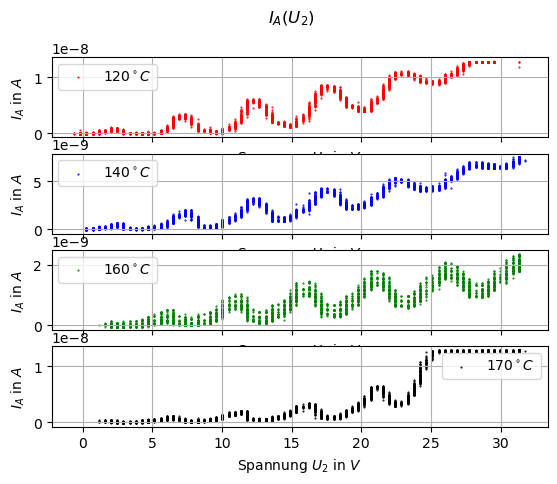

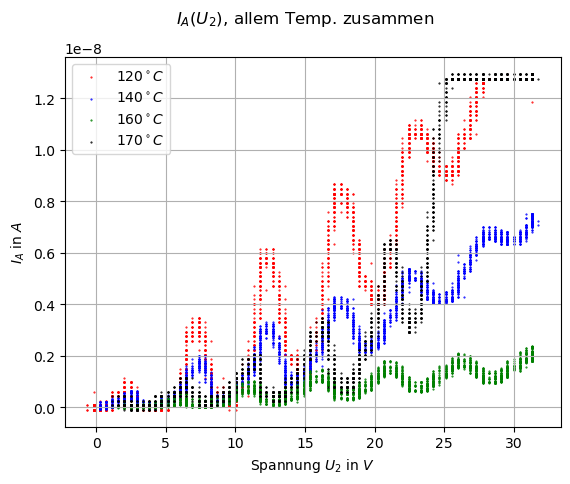

In [4]:
U_H_1 = unp.uarray([4.31 , 4.11 , 4.10 , 5.35] , [0.01]) # Heizspannung in V, 
U_1_1 = unp.uarray([5.32 , 4.09 , 5.32 , 5.32] , [0.01]) # Saugspannung in V,
U_3_1 = unp.uarray([3.07 , 0.98 , 0.00 , 0.57] , [0.01]) # Gegenfeldspannung in V
Temp_1 = np.array([120 , 140 , 160 , 170]) # Temperaturen in °C

# Einlesen der Daten 
df_120C = pd.read_csv("Messungen/Afg1_120C.csv" , delimiter=";", decimal=".")
df_140C = pd.read_csv("Messungen/Afg1_140C.csv" , delimiter=";", decimal=".")
df_160C = pd.read_csv("Messungen/Afg1_160C.csv" , delimiter=";", decimal=".")
df_170C = pd.read_csv("Messungen/Afg1_170C.csv" , delimiter=";", decimal=".")

U_2_120C, I_A_120C = np.array(df_120C["Kanal B"][4:], dtype=np.float32), np.array(df_120C["Kanal A"][4:], dtype=np.float32)*10**(-9)
U_2_140C, I_A_140C = np.array(df_140C["Kanal B"][4:], dtype=np.float32), np.array(df_140C["Kanal A"][4:], dtype=np.float32)*10**(-9)
U_2_160C, I_A_160C = np.array(df_160C["Kanal B"][4:], dtype=np.float32), np.array(df_160C["Kanal A"][4:], dtype=np.float32)*10**(-9)
U_2_170C, I_A_170C = np.array(df_170C["Kanal B"][4:], dtype=np.float32), np.array(df_170C["Kanal A"][4:], dtype=np.float32)*10**(-9)

fig0, ax0 = plt.subplots(4, sharex=True)
ax0[0].scatter(U_2_120C, I_A_120C, s=1, marker=".", c="red", label="$120^\circ C$" )
ax0[0].legend(), ax0[0].grid()
ax0[1].scatter(U_2_140C, I_A_140C, s=1, marker=".", c="blue", label="$140^\circ C$" )
ax0[1].legend(), ax0[1].grid()
ax0[2].scatter(U_2_160C, I_A_160C, s=1, marker=".", c="green", label="$160^\circ C$" )
ax0[2].legend(), ax0[2].grid()
ax0[3].scatter(U_2_170C, I_A_170C, s=1, marker=".", c="black", label="$170^\circ C$" )
ax0[3].legend(), ax0[3].grid()

fig1, ax1 = plt.subplots()
ax1.scatter(U_2_120C, I_A_120C, s=1, marker=".", c="red", label="$120^\circ C$" )
ax1.scatter(U_2_140C, I_A_140C, s=1, marker=".", c="blue", label="$140^\circ C$" )
ax1.scatter(U_2_160C, I_A_160C, s=1, marker=".", c="green", label="$160^\circ C$" )
ax1.scatter(U_2_170C, I_A_170C, s=1, marker=".", c="black", label="$170^\circ C$" )
ax1.legend(), ax1.grid()

fig0.suptitle("$I_A(U_2)$")
fig1.suptitle("$I_A(U_2)$, allem Temp. zusammen")

for ax in ax0:
    ax.set(xlabel="Spannung $U_2$ in $V$", ylabel="$I_A$ in $A$")
ax1.set_xlabel("Spannung $U_2$ in $V$"), ax1.set_ylabel("$I_A$ in $A$")

plt.plot()

Leider konnte der Ofen nicht ganz bis $180^\circ C$ hochheizen, deshalb ist die höchste Temperatur nur bei $170^\circ C$. In der folgenden Tabelle sind noch die spezifischen Spannungswerte zu jeder Temperatur gezeigt.

|$\mathrm{Temperatur\,} \vartheta$|$\mathrm{Saugspannung\,}U_1$|$\mathrm{Gegenfeldspannung\,}U_3$|$\mathrm{Heizspannung\,}U_H$|
|:--:|:--:|:--:|:--:|
|$120^\circ C$|$5.32\,V$|$3.07\,V$|$4.31\,V$|
|$140^\circ C$|$4.09\,V$|$0.98\,V$|$4.11\,V$|
|$160^\circ C$|$5.32\,V$|$0.00\,V$|$4.10\,V$|
|$170^\circ C$|$5.32\,V$|$0.57\,V$|$5.35\,V$|  '

Der Vergleich der Kurvenverläufe lässt sich in dem Plot, in dem alle Franck-Hertz-Kurven gemeinsam dargestellt sind, am besten vornehmen.  
Zunächst zum Einfluss der Temperaturen: In Afg. 1.1 wurde beschrieben, dass eine Senkung der Temperatur eine Erhöhung der mittleren freien Weglänge und damit eine steilere Franck-Hertz-Kurve zur Folge hat und umgekehrt. In oben genanntem Plot sieht man, dass die Kurve in rot ($\vartheta=120^\circ C$) steiler ist als die in blau ($\vartheta=140^\circ C$) und in grün ($\vartheta=160^\circ C$). Die Steigung nimmt mit steigender Temperatur also merklich ab. Einzige Ausnahme ist die scharze Kurve ($\vartheta=170^\circ C$), die aber sowieso schwer zum optimieren war. Man sieht nämlich, dass sie schon bei etwa $U_2=25\,V$ in die Sättigung geht (dazu hätte man $U_1$ senken müssen), aber besser war diese Kurve nicht zu optimieren, da sonst die Peaks zu schlecht sichtbar gewesen wären.  
Den Effekt der Gegenspannung $U_3$ kann man auch gut erkennen: Als einzige Kurve hat die rote ($\vartheta=120^\circ C$) eine Gegenspannung $>1\,V$ (s. Tabelle). Dementsprechend groß sind auch die Höhendifferenzen der Minima und Maxima, im Gegensatz zu den restlichen Kurve, bei denen die Peaks zwar trotzdem relativ gut zu unterscheiden sind, aber die Höhendifferenzen lange nicht so groß sind wie bei der roten Kurve. Das hat, wie in Afg. 1.1 beschrieben, direkt mit der Gegenspannung $U_3$ zu tun.  
Viel mehr lässt sich nur schwer vergleichen, da z.B. die Saugspannung $U_1$ zwischen den versch. Temperaturen fast gleich bleibt. Lediglich für $\vartheta=140^\circ C$ (Kurve in blau) ist die Saugspannung etwas niedriger, ein richtiger Unterschied lässt sich dadurch aber nicht feststellen. 


---

## Aufgabe 2: Charakterisierung der $\mathrm{Hg}$-Röhre

**Hinweise zu Aufgabe 2 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Franck_Hertz_Versuch/doc/Hinweise-Versuchsdurchfuehrung.md).**

Charakterisieren Sie die Röhre, für die Einstellungen von $\vartheta$, $U_{1}$ und $U_{3}$ aus **Aufgabe 1.2**, die Ihnen dafür am besten geeignet erscheinen. Bearbeiten Sie hierzu die folgenden Aufgaben.

---

### Aufgabe 2.1: Bestimmung der Spannungsdifferenz $\Delta U_{B}$ und der effektiven Kontaktspannung $U_{\mathrm{th.}}$

 * Bestimmen Sie die Spannungsdifferenz $\Delta U_{B}$ mit Hilfe der beobachteten Maxima und/oder Minima des Verlaufs von $I_{A}$.
 * Bestimmen Sie die effektive Kontaktspannung $U_{\mathrm{th.}}$.
 * Kalibrieren Sie für Ihre spätere Auswertung die $x$-Achse **aller aufgezeichneten Diagramme** entsprechend, so dass dort $U_{B}$ angezeigt wird.

---

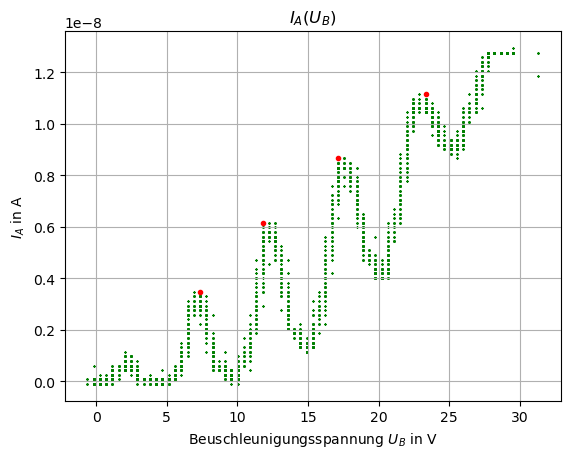

In [5]:
# Definition der benötigten Konstanten
U_1 = 5.32

# Einlesen und formatieren der Daten
data_21 = pd.read_csv('Messungen/Afg1_120C.csv', delimiter=';', decimal='.')

U_2 = np.array(data_21['Kanal B'][3:], dtype = np.float32)
I_A = np.array(data_21['Kanal A'][3:], dtype = np.float32) * 10**-9

# Plotten des Graphen
plt.grid()
plt.scatter(U_2, I_A, s=1, marker='x', c='green')
plt.title('$I_A(U_B)$')
plt.xlabel('Beuschleunigungsspannung $U_B$ in V')
plt.ylabel('$I_A$ in A')

# finden der Peaks
peaks = sc.signal.find_peaks(I_A, distance=350)[0][2:6]
peaks_U_2 = np.array([U_2[int(i)] for i in peaks])
peaks_I = np.array([I_A[int(i)] for i in peaks])

# plotten der peaks
plt.plot(peaks_U_2, peaks_I,'r.')
plt.show()

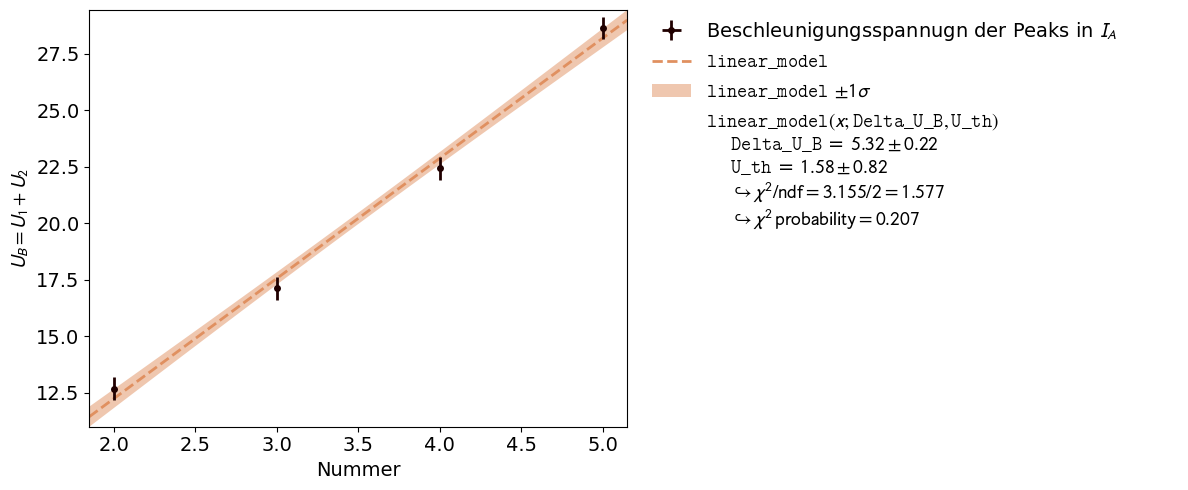

In [6]:
# defining a model
def linear_model(x, Delta_U_B, U_th):
    return Delta_U_B * x + U_th

# fitting data
fit_data = kafe2.XYContainer([2,3,4,5],peaks_U_2 + U_1)
fit_data.label = 'Beschleunigungsspannugn der Peaks in $I_A$'
fit_data.axis_labels = ('Nummer','$U_B = U_1 + U_2$')

fit = kafe2.XYFit(fit_data, linear_model)
fit.add_error('y', 0.5)
fit.do_fit()

# plotting the fit
plot = kafe2.Plot(fit)
plot.plot()
plot.show()

# defining the constants of the fit 
U_th = ufloat(fit.parameter_values[0],fit.parameter_errors[0])
deltaU_B = ufloat(fit.parameter_values[1],fit.parameter_errors[1])

In dieser Aufgabe wird mithilfe der gemessenen Daten aus Aufgabe 1 die effektive Kontaktspannung $U_{th}$ an den Kontakten und die Spannungsdifferenz $\Delta U_B$ zwischen zwei Peaks des Auffängerstroms $I_A$ bestimmt.

Es wird zuerst einer der Datensätze aus Aufgabe 1 ausgewählt. In diesem Fall werden die Werte für $\thetasym = 120°C$, $U_1 = 5.32V$, $U_3 = 3.07V$ und $U_H = 4.31V$ verwendet, da sich für diese Einstellungen der Parameter der deutlichste Verlauf für $I_A$ ergibt und keine Frühzeitige Sättigung stattfindet.

Aus diesem Verlauf werden die Indizes der Peaks von $I_A$ genommen und jeweils deren Spannung und somit auch die Beschleunigungsspannung $U_B = U_1 + U_2$ bestimmt. Diese können nun gegenüber der Nummer des Peaks aufgetragen werden. Über den Fit einer gerade erhält man nun mithilfe der Steigung $\Delta U_B$ und mithilfe des y-Achsen-Abschnitts $U_{th}$

Der durchgeführte Fit liegt mit $\chi^2 = 1.577$ in einem akzeptablen Bereich. Die Unsicherheit auf die Spannung $U_B$ folgt aus der breite der Peaks im Graphen des Anodenstroms und wurde hier auf $1V$ gesetzt. Wir erhalten somit die Werte:
$$\Delta U_B = 5.32V \pm 0.22 V$$
$$U_{th} = 1.58V \pm 0.82V$$


---

### Aufgabe 2.2: Verlauf des Anodenstroms $I_{\mathrm{G2}}$

 * Bestimmen Sie den Anodenstrom $I_{G2}$ als Funktion von $U_{2}$. 
 * Überprüfen Sie durch geeignete Auftragung die aus dem [Raumladungsgesetz](https://de.wikipedia.org/wiki/Raumladungsgesetz) erwartete Abhängigkeit von $U_{2}$.

---

/tmp/ipykernel_8502/4164284924.py:7: RuntimeWarning: invalid value encountered in power
  return K * (U_2 + U_th) ** gamma
/tmp/ipykernel_8502/4164284924.py:7: RuntimeWarning: invalid value encountered in power
  return K * (U_2 + U_th) ** gamma


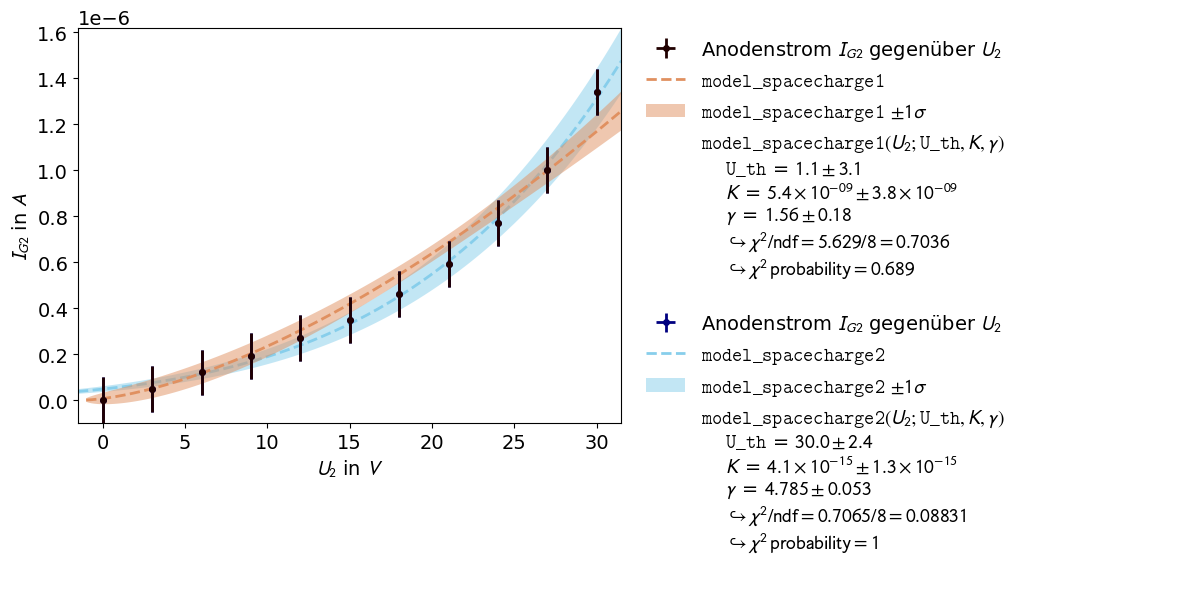

In [7]:
# Messen der Daten
U_1 = ufloat(3.07,0.01)
U_2 = np.array([.0, 3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0, 27.0, 30.0]) # V
I_g2 = np.array([.0, 0.05, 0.12, 0.19, 0.27, 0.35, 0.46, 0.59, 0.77, 1.00, 1.34]) * 10 ** -6 #A, 0.01 std

def model_spacecharge1(U_2,U_th,K=0.005*10**-6,gamma=1.5):
    return K * (U_2 + U_th) ** gamma

def model_spacecharge2(U_2,U_th,K=0.002*10**-6,gamma=1.5):
    return K * (U_2 + U_th) ** gamma

# fitting data
fit_data = kafe2.XYContainer(U_2,I_g2)
fit_data.label = 'Anodenstrom $I_{G2}$ gegenüber $U_2$'
fit_data.axis_labels = ('$U_2$ in $V$','$I_{G2}$ in $A$')

# making fit 2
fit1 = kafe2.XYFit(fit_data, model_spacecharge1)
fit1.add_error('y',0.1 * 10 ** -6)
fit1.do_fit()

# making fit 3
fit2 = kafe2.XYFit(fit_data, model_spacecharge2)
fit2.add_error('y',0.1 * 10 ** -6)
fit2.do_fit()

# plotting the fit
plot = kafe2.Plot([fit1,fit2])
plot.plot()
plot.show()

In diesem Versuchtseil wird bestimmt, ob das  Schottky-Langmurische Raumladungsgesetz, welches eigentlich nur für evakuierte Röhren gilt, auch in diesem Fall angewendet werden kann. Hierfür werden sowohl $U_1$, wie auch $U_3$ auf null geregelt und der Anodenstrom gemessen. 

Der Anodenstrom $I_{G2}$ wird nun gegenüber der Spannung $U_2$ aufgetragen und das Modell $I_{G2} = \kappa \cdot (U_2 + U_{th})^\gamma$ eingepasst. Es kann nun überprüft werden, ob nach dem Schottky-Langmurischen Raumladungsgsesetz $\gamma = \frac{3}{2}$ erfüllt ist. 

Zur Anpassung des Modells werden zwei verschiedenen Fits mit verschiedenen Startbedingungen durchgeführt. Hierbei wird für den orangen Fit $\kappa = 0.005 \cdot 10^{-6}$ und für den blauen Fit $\kappa = 0.002 \cdot 10^{-6}$ gewählt. Daraus resultieren, obwohl diese Startbedingungen sich nicht stark unterscheiden, jeweils zwei verschiednene Werte für $\chi^2$ und $\gamma$.

||$Startbedingung$ $\kappa$|$\chi^2$|$\gamma$|$U_{th}$|
|:--:|:--:|:--:|:--:|:--:|
|$Fit$ $1$ $(orange)$|$0.005 \cdot 10^{-6}$|$0.7036$|$1.56 \pm 0.18$|$1.1V \pm 3.1V$|
|$Fit$ $2$ $(blau)$|$0.002 \cdot 10 ^{-6}$|$0.08831$|$4.785 \pm 0.053$|$30V \pm 2.4V$|

Es ist zu erkennen, das der blaue Fit aufgrund seines geringeren Wertes für $\chi^2$ akzeptiert werden sollte, jedoch weicht hier einerseits die Thermospannung vom in Aufgabe 2.1 bestimmten Wert sehr stark ab und andererseits würde nach $\gamma$ das Raumladungsgesetz nichtmehr gelten. Da jedoch $\chi^2$ des orangen Fits ebenfalls in einem akzeptablen Bereich liegt und hier $U_{th}$, trotz der großen Unsicherheit, mehr in der Größenordnung des bereits bestimmten Wertes liegt wird eher der darin errechnete Wert für $\gamma$ bevorzugt. Da dieser ca. $\frac{3}{2}$ beträgt, kann angenommen werden, dass das Schottky-Langmurische Raumladungsgesetz noch gilt. Das kann jedoch nicht mit abschließender Sicherheit bestätigt werden.

---

## Aufgabe 3: Höhere Anregungen von $\mathrm{Hg}$

**Hinweise zu Aufgabe 3 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Franck_Hertz_Versuch/doc/Hinweise-Versuchsdurchfuehrung.md).**

Untersuchen Sie höhere Anregungen von $\mathrm{Hg}$ und schätzen Sie seine Ionisierungsenergie ab. Bearbeiten Sie hierzu die folgenden Aufgaben.

---

### Aufgabe 3.1: Beobachtung höherer Anregungen von $\mathrm{Hg}$

 * Bestimmen Sie den Verlauf von $I_{A}$ als Funktion von $U_{B}$ unter Betriebsbedingungen, die für die Erzeugung höherer Anregungszustände in $\mathrm{Hg}$ geeignet sind. 
 * Versuchen Sie im Rahmen Ihrer Auswertung soviele Strukturen im Verlauf von $I_{A}$ wie möglich zu identifizieren. Dieser wird im Wesentlichen durch Linearkombinationen der beiden niedrigsten Anregungsenergien bestimmt.

---

[Text(0.5, 0, 'Spannung $U_2$ in $V$'), Text(0, 0.5, '$I_A$ in $A$')]

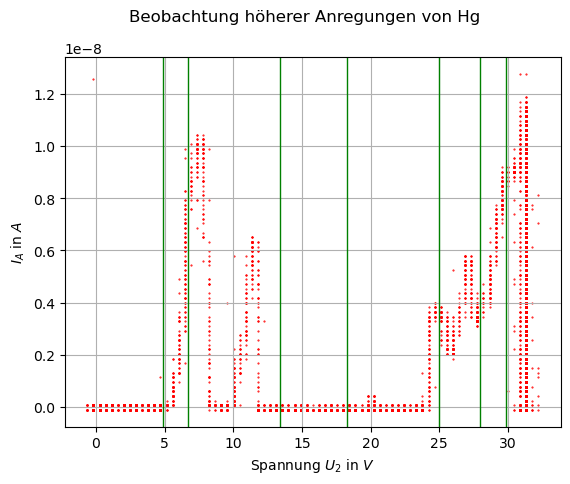

In [8]:
U_H = 4.53
U_3 = 2.47
df_Afg3 = pd.read_csv("Messungen/Afg3.csv" , delimiter=";", decimal=".")
U_2_3, I_A_3 = np.array(df_Afg3["Kanal B"][4:], dtype=np.float32) , np.array(df_Afg3["Kanal A"][4:], dtype=np.float32)*10**(-9)



fig1, ax1 = plt.subplots()
ax1.scatter(U_2_3, I_A_3, s=1, marker=".", c="red" )
ax1.axvline(x=4.86, color="green", linewidth=1.)
ax1.axvline(x=6.7, color="green", linewidth=1.)
ax1.axvline(x=2*6.7, color="green", linewidth=1.)
ax1.axvline(x=2*6.7+4.86, color="green", linewidth=1.)
ax1.axvline(x=2*6.7+3*4.86, color="green", linewidth=1.)
ax1.axvline(x=3*6.7+4.86, color="green", linewidth=1.)
ax1.axvline(x=3*6.7+2*4.86, color="green", linewidth=1.)


ax1.grid()

fig1.suptitle("Beobachtung höherer Anregungen von Hg")
ax1.set(xlabel="Spannung $U_2$ in $V$", ylabel="$I_A$ in $A$")

**Lösung:**

*Fügen Sie Ihre Lösung zu dieser Aufgabe hier ein. Löschen Sie hierzu diesen kursiv gestellten Text aus dem Dokument. Um Code-Fragmente und Skripte in [Python](https://www.python.org/), sowie ggf. bildliche Darstellungen direkt ins [Jupyter notebook](https://jupyter.org/) einzubinden fügen Sie dem notebook eine Code-Zelle zu.* 

---

### Aufgabe 3.2: Ionisierungsenergie von $\mathrm{Hg}$

 * Bestimmen Sie aus dem Verlauf von $I_{G_{2}}$ als Funktion von $U_{B}$ die Ionisierungsenergie von $\mathrm{Hg}$.
 * Beobachten Sie mit dem Taschenspektroskop die im Bereich des sichtbaren Lichts liegenden Emissionslinien bei brennender Gasentladung. Lassen Sie hierzu eine ständige Gasentladung zünden. Fügen Sie Ihrem Protokoll ein entsprechendes Bild zu.
 
---

<ErrorbarContainer object of 3 artists>

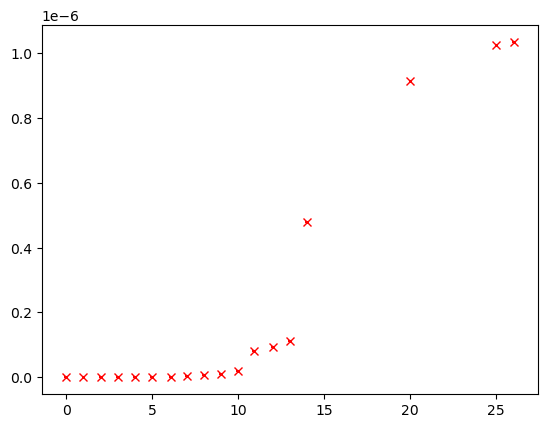

In [9]:
U_2 = unp.uarray([0. , 1. , 2. , 3. , 4. , 5. , 6.1 , 7. , 8. , 9. , 10. , 10.9 , 12. , 13. , 14. , 20. , 25. , 26. ],[0.1])
I_g2 = unp.uarray([0. , 0. , 0. , 0.1 , 0.31 , 0.84 , 1.74 , 2.97 , 5.16 , 10.35 , 18.32 , 81.22 , 93.22 , 112.6 , 479.2 , 914.7 , 1024.5,1035.4],[1]) * 10** -9
plt.errorbar(unp.nominal_values(U_2), unp.nominal_values(I_g2), xerr=unp.std_devs(U_2), yerr=unp.std_devs(I_g2), fmt="rx")

**Lösung:**

*Fügen Sie Ihre Lösung zu dieser Aufgabe hier ein. Löschen Sie hierzu diesen kursiv gestellten Text aus dem Dokument. Um Code-Fragmente und Skripte in [Python](https://www.python.org/), sowie ggf. bildliche Darstellungen direkt ins [Jupyter notebook](https://jupyter.org/) einzubinden fügen Sie dem notebook eine Code-Zelle zu.* 

---

## Aufgabe 4: Bestimmung der mittleren Energie für die Anregung von $\mathrm{Ne}$ durch Elektronenstoß

**Hinweise zu Aufgabe 4 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Franck_Hertz_Versuch/doc/Hinweise-Versuchsdurchfuehrung.md).**

Bestimmen Sie die mittlere Energie für die vorherrschenden Anregungen von $\mathrm{Ne}$ durch Elektronenstoß. Gehen Sie dabei analog zu **Aufgabe 2.1** vor. 

---

![Franck-Hertz_Neon](Messungen/Franck-Hertz-Kurve%20Neon.jpeg)

In [14]:
#m Definition der Thermospannung
U_th = ufloat(2.5,0.5)

# ausmessen der Peaks
p1 = ufloat(15,0.5)
p2 = ufloat(31,0.5)

# Ausrechnen der Anregungsenergie
DU_B = p2 - p1 
E = DU_B + U_th

# Ausgeben der Werte
print(f'Die Spannugnsdifferenz zwischen zwei Peaks beträgt {DU_B.n}V +/- {round(DU_B.s,2)}V')
print(f'Die mittlere Anregungsenergie beträgt {E.n}eV +/- {round(E.s,2)}eV')

Die Spannugnsdifferenz zwischen zwei Peaks beträgt 16.0V +/- 0.71V
Die mittlere Anregungsenergie beträgt 18.5eV +/- 0.87eV


Im letzten Teil des Versuches soll die mittlere Anregungsenergie von Neon mittels eines Franck-Hertz-Aufbaus durchgeführt werden. Dieser Aufbau war nur einmal vorhandne und der Versuch wurde vom Tutor durchgeführt.

Analog zu Aufgabe 2.1 werden die Spannungen $U_2$ bestimmt, bei denen Peaks in $I_A$ auftreten. Die Peaks werden in diesem Fall jedoch mittels des Graphen eines Oszilloskops händisch ausgelesen. Hierbei beträgt ein Kästchen auf der x-Achse $10V$. Für die Peaks ergeben sich somit Positionen von $15V$ und $31V$ mit jeweils Unsicherheiten von $0.5V$. Somit erhält man  $U_B = 16V \pm 0.71V$ und mithilfe der Thermospannung $U_{th} = 2.5V \pm 0.5V$ schlussendlich die mittlere Anregungsenergie:
$$\bar{E_{Ne}} = 18.5eV \pm 0.87eV$$

Der Literaturwerte $E_{Ne}^{Lit} = 18eV$ liegt innerhalb der $\sigma$-Umgebung des Messwertes.

---